Step 1: Import Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer



Step 2: Load and Inspect the Dataset

In [22]:
# Load the dataset
df = pd.read_csv('housing_price_dataset.csv')

# Show the first few rows
print(df.head())

# Show column names
print("Columns in dataset:\n", df.columns)


   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065
Columns in dataset:
 Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')


Step 3: Clean Column Names and Identify Target

In [23]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Try to find the target column
for col in df.columns:
    if 'price' in col.lower():
        print("Possible target column:", col)


Possible target column: Price


Step 4: Define Features (X) and Target (y)

In [25]:
target_col = 'Price'  # change this if needed
X = df.drop([target_col], axis=1)
y = df[target_col]


Step 5: Encode Categorical Columns

In [26]:
# Convert string columns to numbers
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


 Step 6: Handle Missing Values

In [27]:
# Fill missing values with median
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


Step 7: Train-Test Split

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Step 8: Train Linear Regression Model

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Step 9: Evaluate on Validation Set

In [30]:
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"Validation RMSE: {rmse:.2f}")


Validation RMSE: 49366.52


Step 10: Actual vs Predicted Scatter Plot

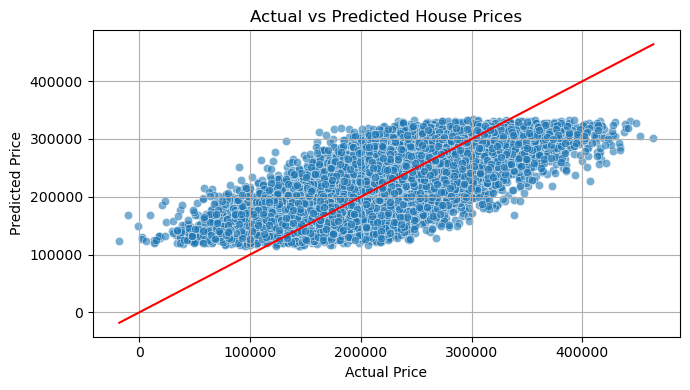

In [45]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x=y_val, y=val_preds, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red')
plt.grid(True)
plt.tight_layout()
plt.show()

Step 11: KDE Distribution Plot

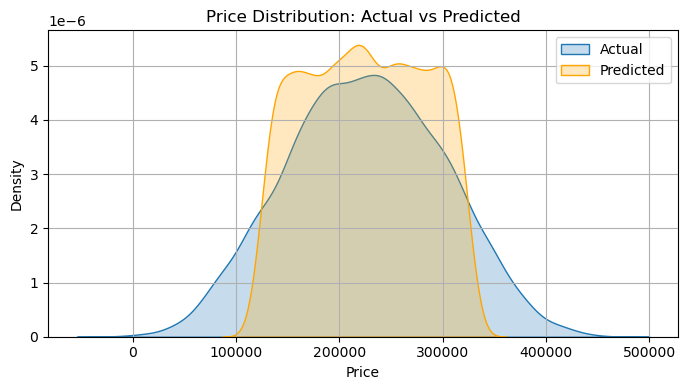

In [44]:
plt.figure(figsize=(7, 4))
sns.kdeplot(y_val, label="Actual", fill=True)
sns.kdeplot(val_preds, label="Predicted", fill=True, color="orange")
plt.title("Price Distribution: Actual vs Predicted")
plt.xlabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Step 12: Correlation Heatmap (Top 10 Features)

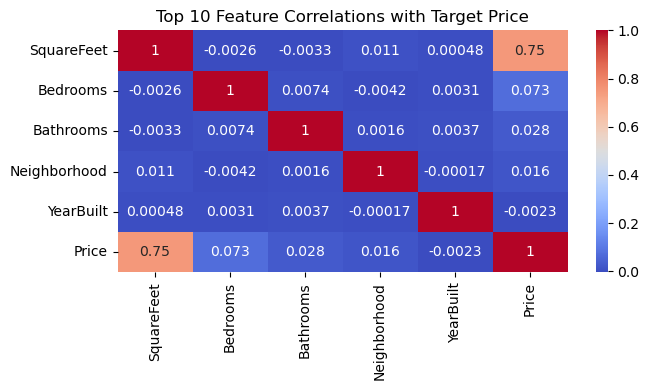

In [43]:
# Add target column back for correlation analysis
corr_data = pd.concat([X, y], axis=1)

# Get top correlated features
correlations = corr_data.corr()[target_col].abs().sort_values(ascending=False)
top_features = correlations[1:11].index  # Skip the target itself

plt.figure(figsize=(7,4))
sns.heatmap(corr_data[top_features.tolist() + [target_col]].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 Feature Correlations with Target Price")
plt.tight_layout()
plt.show()
